In [ ]:
from load_modules import *
import csv
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colorspacious
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"

In [1]:

physical_devices = tf.config.list_physical_devices('GPU')
#set memory amount to half of GPU

if len(physical_devices) > 0:
    for device in physical_devices:
        print("Device:", device)
else:
    print("No GPU devices found.")

# Set GPU memory growth
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Test for GPU device name
name = tf.test.gpu_device_name()
if name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(name))

# Print the number of available GPUs
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

NameError: name 'tf' is not defined

In [19]:
# WIDTH = HEIGHT = DIM = 4096


image_folder = r"C:\Users\joeli\Dropbox\models_4k"
# image_folder = r"C:\Users\joeli\OneDrive\Desktop\meta models"
image_paths = os.listdir(image_folder)
images = []
names = []
for image_path in image_paths:
    folder_name = image_path.split('.')[0]
    names.append(folder_name)
    image_path = os.path.join(image_folder, image_path)
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    #check if 0 to 1
    if np.max(image) > 1:
        image = image/255.0
    images.append(image)
print(names)
all_model_paths = []

encoder_path = r"C:\Users\joeli\Dropbox\ae_top_models\ThreeOneSix\encoder.h5"
decoder_path = r"C:\Users\joeli\Dropbox\ae_top_models\ThreeOneSix\decoder.h5"
encoder = tf.keras.models.load_model(encoder_path)
decoder = tf.keras.models.load_model(decoder_path)
encoder_paths = []
decoder_paths = []

def encode(img):
    image = np.asarray(img).reshape(-1,3).astype('float32')
    # pred_maps = encoder.predict(image)
    start = time.time()
    # with tf.device('/device:GPU:0') as device:
    #     pred_maps = encoder.predict_on_batch(image)
    pred_maps = encoder.predict_on_batch(image)
    end = time.time()
    elapsed = end - start
    return pred_maps, elapsed
 
def decode(encoded):
    # recovered = decoder.predict(encoded)
    start = time.time()
    recovered = decoder.predict_on_batch(encoded)
    # with tf.device('/device:GPU:0') as device:
    #     recovered = decoder.predict_on_batch(encoded)
    end = time.time()
    elapsed = end - start
    # recovered = np.clip(recovered, 0, 1)
    
    return recovered, elapsed
def calculate_deltaE(original, recovered):  # assuming this function is defined
    WIDTH = original.shape[0]
    HEIGHT = original.shape[1]
    # Convert the images to the CAM02-UCS color space and calculate the delta E loss
    if original.shape[0] != recovered.shape[0] or original.shape[1] != recovered.shape[1]:
        print("original shape:", original.shape)
        print("recovered shape:", recovered.shape)
        print("original and recovered shape do not match")
        original = original.reshape((WIDTH, HEIGHT, 3))
        recovered = recovered.reshape((WIDTH, HEIGHT, 3))

    original_lab = colorspacious.cspace_convert(np.array(original), 'sRGB1', 'CAM02-UCS').reshape((WIDTH,HEIGHT,3))
    recovered_lab = colorspacious.cspace_convert(np.array(recovered), 'sRGB1', 'CAM02-UCS').reshape((WIDTH,HEIGHT,3))
    delta_e = np.sqrt(np.sum((original_lab - recovered_lab)**2, axis=2))

    # Plot the delta E loss in the third subplot
    return delta_e

['m141_4k', 'm46_4k', 'm53_4k', 'm64_4k', 'm98_4k']


shape of pred_maps: (16777216, 5)
Cm min: -0.12033899128437042 Cm mean: -0.03945447504520416| Cm max: 0.6048187613487244 | Ch min: 0.019863318651914597 Ch mean: 0.07274745404720306| Ch max: 0.26485392451286316 | T min: 0.11884630471467972 T mean: 0.25358089804649353| T max: 0.2948349118232727 | Bm min: 0.4372950792312622 Bm mean: 0.4672556519508362| Bm max: 0.5214961767196655 | Bh min: 0.3536853790283203 Bh mean: 0.4932069182395935| Bh max: 0.7057725191116333
shape of recovered: (16777216, 3)


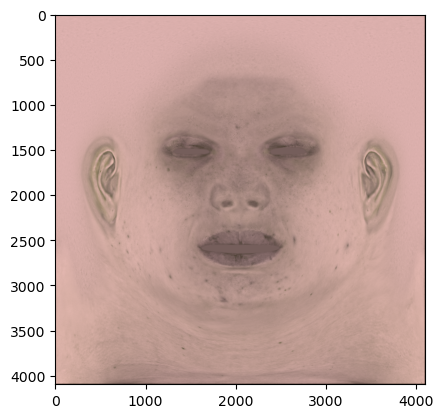

size of image: (4096, 4096, 3)
max pixel value: 0.9406850337982178
min pixel value: 0.08775613456964493
shape of pred_maps: (16777216, 5)
Cm min: 0.033463288098573685 Cm mean: 0.16528354585170746| Cm max: 0.6082751750946045 | Ch min: 0.0914304107427597 Ch mean: 0.13963480293750763| Ch max: 0.2609216570854187 | T min: 0.11520218104124069 T mean: 0.20235851407051086| T max: 0.23733200132846832 | Bm min: 0.4475538730621338 Bm mean: 0.46694934368133545| Bm max: 0.5535010099411011 | Bh min: 0.34195780754089355 Bh mean: 0.5367228984832764| Bh max: 0.6924225687980652
shape of recovered: (16777216, 3)


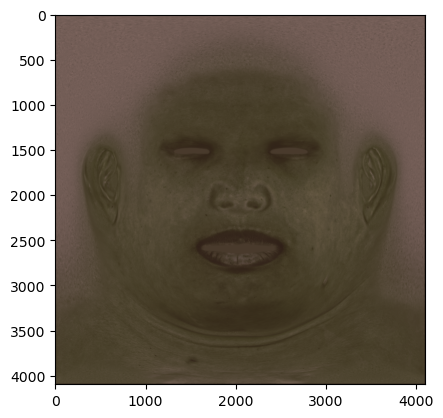

size of image: (4096, 4096, 3)
max pixel value: 0.5957490801811218
min pixel value: 0.0877481997013092
shape of pred_maps: (16777216, 5)
Cm min: -0.06582620739936829 Cm mean: 0.03668559715151787| Cm max: 0.6065470576286316 | Ch min: 0.008262671530246735 Ch mean: 0.0817338228225708| Ch max: 0.25555887818336487 | T min: 0.11766653507947922 T mean: 0.24845759570598602| T max: 0.3081355392932892 | Bm min: 0.4384395480155945 Bm mean: 0.4616990387439728| Bm max: 0.5287182927131653 | Bh min: 0.34930703043937683 Bh mean: 0.5480659604072571| Bh max: 0.7298310995101929
shape of recovered: (16777216, 3)


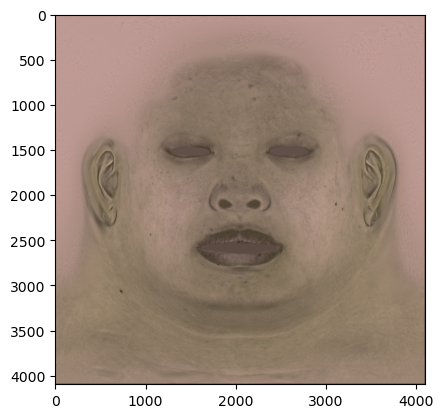

size of image: (4096, 4096, 3)
max pixel value: 0.8340380191802979
min pixel value: 0.08779283612966537
shape of pred_maps: (16777216, 5)
Cm min: -0.018970008939504623 Cm mean: 0.3336601257324219| Cm max: 0.605862557888031 | Ch min: 0.11351734399795532 Ch mean: 0.19761061668395996| Ch max: 0.27182018756866455 | T min: 0.11884630471467972 T mean: 0.17639140784740448| T max: 0.22262898087501526 | Bm min: 0.45514991879463196 Bm mean: 0.5027583241462708| Bm max: 0.5416910648345947 | Bh min: 0.3536853790283203 Bh mean: 0.5085182785987854| Bh max: 0.6169816255569458
shape of recovered: (16777216, 3)


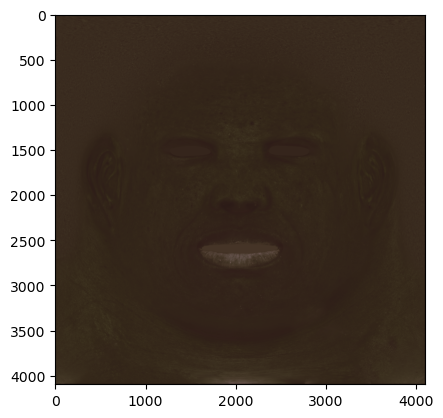

size of image: (4096, 4096, 3)
max pixel value: 0.6680722832679749
min pixel value: 0.08754277229309082
shape of pred_maps: (16777216, 5)
Cm min: 0.01697242632508278 Cm mean: 0.49287623167037964| Cm max: 0.6065470576286316 | Ch min: 0.13492953777313232 Ch mean: 0.2543758451938629| Ch max: 0.2754439413547516 | T min: 0.11794907599687576 T mean: 0.14623196423053741| T max: 0.1932644546031952 | Bm min: 0.4418247938156128 Bm mean: 0.5230117440223694| Bm max: 0.5455486178398132 | Bh min: 0.33234885334968567 Bh mean: 0.41791656613349915| Bh max: 0.5345053672790527
shape of recovered: (16777216, 3)


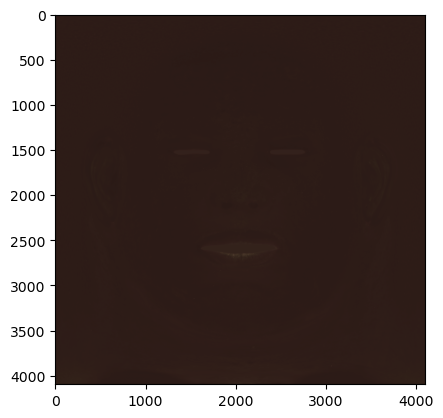

size of image: (4096, 4096, 3)
max pixel value: 0.6010172367095947
min pixel value: 0.087559774518013


In [28]:

# fig,ax = plt.subplots(5,5, figsize=(16,14))
subjects_meta = ['m141_4k', 'm46_4k', 'm53_4k', 'm64_4k', 'm98_4k']
idx = 0
for image, folder_name in zip(images, names):
    WIDTH = image.shape[0]
    HEIGHT = image.shape[1]

    image = np.asarray(image)
    
    image_numpy = image.reshape((WIDTH, HEIGHT, 3))

    pred_maps, encode_time = encode(image_numpy)
    print(f"shape of pred_maps: {pred_maps.shape}")
    # print(f"encode time: {encode_time}")
    # print(f"decode time: {decode_time}")
    Cm = np.asarray(pred_maps[:,0])
    Ch = np.asarray(pred_maps[:,1])
    Bm = np.asarray(pred_maps[:,2])
    Bh = np.asarray(pred_maps[:,3])
    T = np.asarray(pred_maps[:,4])
    av_T = np.mean(T)
    max_T = np.max(T)
    min_T = np.min(T)
    av_Cm = np.mean(Cm)
    max_Cm = np.max(Cm)
    min_Cm = np.min(Cm)
    av_Ch = np.mean(Ch)
    max_Ch = np.max(Ch)
    min_Ch = np.min(Ch)
    min_Bm = np.min(Bm)
    max_Bm = np.max(Bm)
    av_Bm = np.mean(Bm)
    min_Bh = np.min(Bh)
    max_Bh = np.max(Bh)
    av_Bh = np.mean(Bh)
    # result_string = f"Cm: {av_Cm}, {max_Cm}, {min_Cm} | Ch: {av_Ch}, {max_Ch}, {min_Ch} | T: {av_T}, {max_T}, {min_T} | delta_e: {av_delta_e}, {max_delta_e}, {min_delta_e}"
    result_string = f"Cm min: {min_Cm} Cm mean: {av_Cm}| Cm max: {max_Cm} | Ch min: {min_Ch} Ch mean: {av_Ch}| Ch max: {max_Ch} | T min: {min_T} T mean: {av_T}| T max: {max_T} | Bm min: {min_Bm} Bm mean: {av_Bm}| Bm max: {max_Bm} | Bh min: {min_Bh} Bh mean: {av_Bh}| Bh max: {max_Bh}"
    print(result_string)
    pred_maps[:,0] = Cm
    pred_maps[:,1] = Ch
    pred_maps[:,2] = Bm
    pred_maps[:,3] = Bh*0
    pred_maps[:,4] = T
    recovered, decode_time = decode(pred_maps)
    print(f"shape of recovered: {recovered.shape}")
    recovered = np.asarray(recovered).reshape((WIDTH, HEIGHT, 3))
    # recovered_lab= colorspacious.cspace_convert(recovered, 'sRGB1', 'CAM02-UCS')

    # recovered = np.asarray(decoded_increased_Cm).reshape((WIDTH, HEIGHT, 3))
    plt.imshow(recovered)
    plt.show()
    #save the image 
    #print size of image
    print(f"size of image: {recovered.shape}")
    #max min pixel values
    print(f"max pixel value: {np.max(recovered)}")
    print(f"min pixel value: {np.min(recovered)}")
    #clamp the values to 0-1
    recovered = np.clip(recovered, 0, 1)
    file_NAME = f"zbh_{subjects_meta[idx]}.png"
    plt.imsave(file_NAME, recovered)
    idx += 1
    

Age Related Parameter Changes

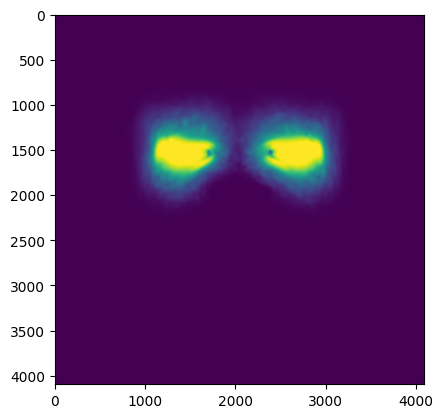

In [ ]:
rgb_eye_lip_ear = r"C:\Users\joeli\Dropbox\AE_InputModels\models_with_masks\m32\masks\XYZ_ID_mask_02_lin_srgb.1001.png"
#load and exctract the red
rgb_eye_lip_ear = Image.open(rgb_eye_lip_ear)
rgb_eye_lip_ear = np.asarray(rgb_eye_lip_ear)
rgb_eye_lip_ear = rgb_eye_lip_ear[:,:,0]
rgb_eye_lip_ear = rgb_eye_lip_ear/255.0
#resize to 4096 x 4096
rgb_eye_lip_ear = cv2.resize(rgb_eye_lip_ear, (4096, 4096), interpolation = cv2.INTER_AREA)
eye_mask = rgb_eye_lip_ear.copy()
plt.imshow(rgb_eye_lip_ear)
plt.show()

Cm min: -0.14391764998435974 Cm mean: -0.058768127113580704| Cm max: 0.5553179979324341 | Ch min: 0.05475694686174393 Ch mean: 0.15230384469032288| Ch max: 0.35611438751220703 | T min: 0.08287431299686432 T mean: 0.18577319383621216| T max: 0.2817070186138153 | Bm min: 0.36883974075317383 Bm mean: 0.49342453479766846| Bm max: 0.5528973340988159 | Bh min: 0.42639827728271484 Bh mean: 0.5174049735069275| Bh max: 0.5934738516807556
shape of Cm_increase: (16777216,)
shape of Cm: (16777216,)
[[0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 ...
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]]


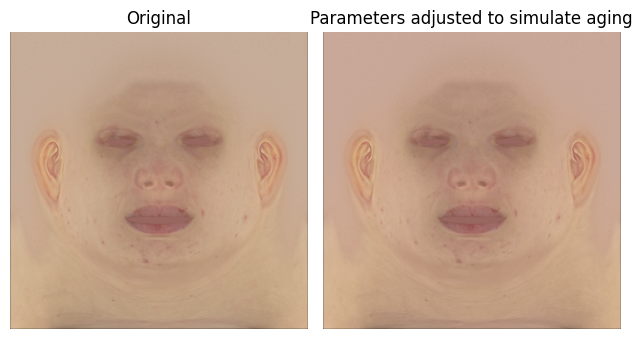

Cm min: 0.006677117198705673 Cm mean: 0.16292521357536316| Cm max: 0.558076798915863 | Ch min: 0.1223030537366867 Ch mean: 0.18004290759563446| Ch max: 0.36388084292411804 | T min: 0.09068870544433594 T mean: 0.17591334879398346| T max: 0.2529386878013611 | Bm min: 0.3998561203479767 Bm mean: 0.4374184012413025| Bm max: 0.5275864005088806 | Bh min: 0.4409658908843994 Bh mean: 0.5038401484489441| Bh max: 0.570142924785614
shape of Cm_increase: (16777216,)
shape of Cm: (16777216,)
[[0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 ...
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]]


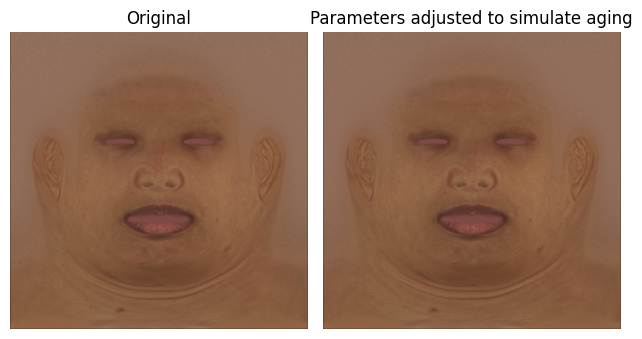

Cm min: -0.09592388570308685 Cm mean: 0.008004407398402691| Cm max: 0.5566769242286682 | Ch min: 0.06426335871219635 Ch mean: 0.12952513992786407| Ch max: 0.3577303886413574 | T min: 0.0918692797422409 T mean: 0.20179520547389984| T max: 0.28744667768478394 | Bm min: 0.37529030442237854 Bm mean: 0.4481109380722046| Bm max: 0.517357587814331 | Bh min: 0.4401417672634125 Bh mean: 0.5235356688499451| Bh max: 0.590853214263916
shape of Cm_increase: (16777216,)
shape of Cm: (16777216,)
[[0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 ...
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]]


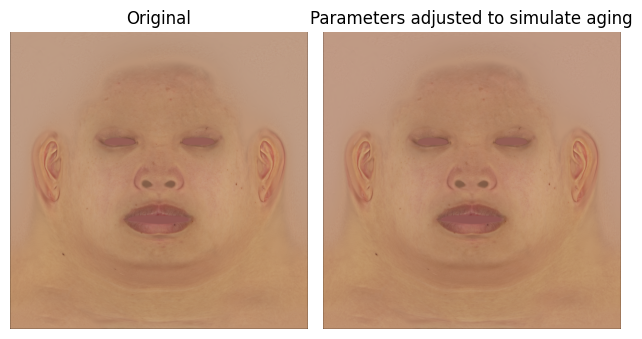

Cm min: -0.0059272535145282745 Cm mean: 0.32733723521232605| Cm max: 0.5553179979324341 | Ch min: 0.16258026659488678 Ch mean: 0.25377967953681946| Ch max: 0.362850159406662 | T min: 0.06863337755203247 T mean: 0.15285108983516693| T max: 0.21860063076019287 | Bm min: 0.427295446395874 Bm mean: 0.4678398072719574| Bm max: 0.5253611207008362 | Bh min: 0.421621710062027 Bh mean: 0.4984261393547058| Bh max: 0.5438891053199768
shape of Cm_increase: (16777216,)
shape of Cm: (16777216,)
[[0.13383523 0.08036387 0.05739989]
 [0.13730004 0.08395093 0.06110445]
 [0.13730004 0.08395093 0.06110445]
 ...
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]]


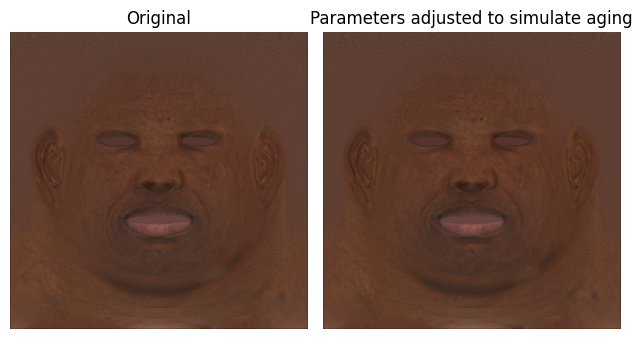

Cm min: 0.018054179847240448 Cm mean: 0.44759857654571533| Cm max: 0.5566769242286682 | Ch min: 0.17202326655387878 Ch mean: 0.33227404952049255| Ch max: 0.36454930901527405 | T min: 0.05718075484037399 T mean: 0.10063812136650085| T max: 0.16577428579330444 | Bm min: 0.3974396884441376 Bm mean: 0.491216778755188| Bm max: 0.529151976108551 | Bh min: 0.3889737129211426 Bh mean: 0.4676780104637146| Bh max: 0.5218701362609863
shape of Cm_increase: (16777216,)
shape of Cm: (16777216,)
[[0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 [0.12825671 0.07384437 0.0441928 ]
 ...
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]
 [0.12828791 0.07386668 0.04432649]]


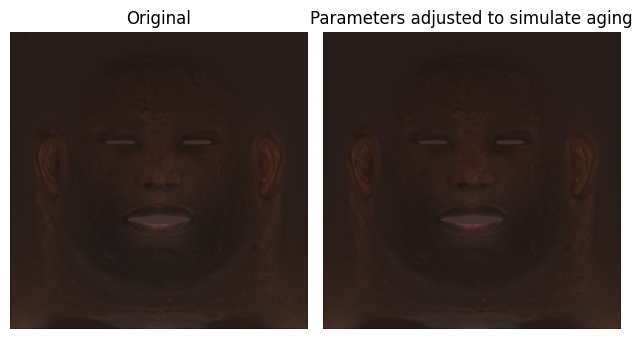

In [ ]:
import scipy
subjects_meta = ["Subject A", "Subject C", "Subject D", "Subject E", "Subject F"]
for image, folder_name in zip(images, names):

    WIDTH = HEIGHT = 4096
    spot_mask = Image.open(r"C:\Users\joeli\OneDrive\Documents\GitHub\mediapipe-facemesh\combined_mask.png")
    spot_mask = spot_mask.resize((WIDTH, HEIGHT))
    spot_mask = np.asarray(spot_mask)
    spot_mask = spot_mask[:,:,0].reshape((WIDTH, HEIGHT))
    spot_mask = spot_mask/255.0
    #gaussian blur the mask
    spot_mask = scipy.ndimage.gaussian_filter(spot_mask, sigma=10)
    #add noise to the mask
    spot_mask = spot_mask + np.random.normal(0, 0.01, (WIDTH, HEIGHT))

    lips_mask = Image.open(r"C:\Users\joeli\Dropbox\rendered models\m46\lips_mask.png")
    lips_mask = lips_mask.resize((WIDTH, HEIGHT))
    lips_mask = np.asarray(lips_mask)
    lips_mask = lips_mask[:,:,0].reshape((WIDTH, HEIGHT))
    lips_mask = lips_mask/255.0

    blemish_mask = Image.open(r"C:\Users\joeli\OneDrive\Documents\GitHub\mediapipe-facemesh\blemish_mask.png")
    blemish_mask = blemish_mask.resize((WIDTH, HEIGHT))
    blemish_mask = np.asarray(blemish_mask)
    blemish_mask = blemish_mask[:,:,0].reshape((WIDTH, HEIGHT))
    blemish_mask = blemish_mask/255.0
    spot_mask = spot_mask.astype(np.float32)
    image = image.astype(np.float32)
    pred_maps, encode_time =  encode(image)
    pred_maps = np.asarray(pred_maps)

    pred_maps = pred_maps.reshape((-1, 5))

    Cm = np.asarray(pred_maps[:,0])
    Ch = np.asarray(pred_maps[:,1])
    Bm = np.asarray(pred_maps[:,2])
    Bh = np.asarray(pred_maps[:,3])
    T = np.asarray(pred_maps[:,4])
    av_T = np.mean(T)
    max_T = np.max(T)
    min_T = np.min(T)
    av_Cm = np.mean(Cm)
    max_Cm = np.max(Cm)
    min_Cm = np.min(Cm)
    av_Ch = np.mean(Ch)
    max_Ch = np.max(Ch)
    min_Ch = np.min(Ch)
    min_Bm = np.min(Bm)
    max_Bm = np.max(Bm)
    av_Bm = np.mean(Bm)
    min_Bh = np.min(Bh)
    max_Bh = np.max(Bh)
    av_Bh = np.mean(Bh)
    # result_string = f"Cm: {av_Cm}, {max_Cm}, {min_Cm} | Ch: {av_Ch}, {max_Ch}, {min_Ch} | T: {av_T}, {max_T}, {min_T} | delta_e: {av_delta_e}, {max_delta_e}, {min_delta_e}"
    result_string = f"Cm min: {min_Cm} Cm mean: {av_Cm}| Cm max: {max_Cm} | Ch min: {min_Ch} Ch mean: {av_Ch}| Ch max: {max_Ch} | T min: {min_T} T mean: {av_T}| T max: {max_T} | Bm min: {min_Bm} Bm mean: {av_Bm}| Bm max: {max_Bm} | Bh min: {min_Bh} Bh mean: {av_Bh}| Bh max: {max_Bh}"
    print(result_string)
    bias_cm = 0
    bias_ch = 0
    bias_bm = 0
    bias_bh = 0
    if min_Cm < -0.1:
        #get average of all negative values in Cm
        bias_cm = Cm[Cm < 0]
        bias_cm = np.mean(bias_cm)
        bias_cm = np.abs(bias_cm)
    if min_Ch < -0.2:
        #get average of all negative values in Ch
        bias_ch = Ch[Ch < 0]
        bias_ch = np.mean(bias_ch)
        bias_ch = np.abs(bias_ch)
    if min_Bm < -0.2:
        #get average of all negative values in Bm
        bias_bm = Bm[Bm < 0]
        bias_bm = np.mean(bias_bm)
        bias_bm = np.abs(bias_bm)
    if min_Bh < -0.2:
        #get average of all negative values in Bh
        bias_bh = Bh[Bh < 0]
        bias_bh = np.mean(bias_bh)
        bias_bh = np.abs(bias_bh)
    if av_Cm > 0.4:
        Cm_increase = Cm*0.85
        Bm_increase = Bm*0.85

    else: 
        Cm_increase = Cm+bias_cm
        Cm_increase = Cm_increase*2.5
        Bm_increase = Bm+bias_bm
        Bm_increase  = Bm_increase*1.5
    Ch_increase = Ch+bias_ch
    Ch_increase = Ch_increase*2.0
    Bm_increase = Bm+bias_bm
    Bm_increase  = Bm_increase*1.5
    Bh_increase = Bh+bias_bh
    Bh_increase  = Bh_increase*4.0
    T_increase  = T*2.0

    Ch_decrease = Ch*0.85
    Bh_decrease = Bh*0.75
    Bm_decrease = Bm*0.75
    T_decrease = T*0.85
    Ch_increase_av = np.mean(Ch_increase)
    Cm_increase_av = np.mean(Cm_increase)
    Bh_increase_av = np.mean(Bh_increase)
    Bm_increase_av = np.mean(Bm_increase)
    T_increase_av = np.mean(T_increase)
    print(f"shape of Cm_increase: {Cm_increase.shape}")
    #cm
    print(f"shape of Cm: {Cm.shape}")
    #blur spot mask
    # spot_mask = cv2.GaussianBlur(spot_mask, (5,5), 0)
    Cm = np.where(spot_mask.reshape(-1,)>0, Cm*1.3, Cm*0.9)
    Cm = np.where(lips_mask.reshape(-1,)>0, Cm*1.2, Cm)

    #ch
    Ch = np.where(blemish_mask.reshape(-1,)>=1, Ch*1.5, Ch)
    Bh = np.where(blemish_mask.reshape(-1,)<0.25, Bh*0.75, Bh)
    Bh = np.where(lips_mask.reshape(-1,)>=1, Bh*0.7, Bh)
    #eyes
    Bh = np.where(eye_mask.reshape(-1,)>0, Bh*0.7, Bh)
    # T = np.where(blemish_mask.reshape(-1,)>=1, T_decrease, T)
    T = T*0.80

    # pred_maps[:,0] = Cm
    # #decrease Ch
    # pred_maps[:,1] = Ch_decrease
    # #decresae Bh
    # pred_maps[:,3] = Bh_decrease
    # #decrease Bm
    # pred_maps[:,2] = Bm_decrease
    # #print max value of Cm_increase
    # pred_maps[:,4] = T_decrease
    # print(np.max(Cm_increase))

    # Cm_increase = np.clip(Cm_increase, 0, 1)  # Ensure values stay within valid

    recovered, decode_time = decode(pred_maps)

    # recovered = np.resize(np.asarray(recovered), (WIDTH, HEIGHT, 3))
    #print(type(recovered))
    print(recovered)
    #convert to RGB width, height, 3
    recovered = np.asarray(recovered).reshape((WIDTH, HEIGHT, 3))
    recovered = Image.fromarray((recovered*255.0).astype(np.uint8)) #convert to RGB image
    recovered = Image.blend(Image.fromarray((image*255.0).astype(np.uint8)), recovered, 0.75)
    name = f"{folder_name}_age_mask.png"
    recovered.save(name)
    #plot side by side
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image)
    ax[0].set_title("Original")
    ax[1].imshow(recovered)
    ax[1].set_title("Parameters adjusted to simulate aging")
    #remove ticks and whitespace
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Emotion Related Parameter Changes

In [ ]:
lips_mask = Image.open(r"C:\Users\joeli\OneDrive\Documents\GitHub\mediapipe-facemesh\lips_mask.png")
lips_mask = lips_mask.resize((WIDTH, HEIGHT))
lips_mask = np.asarray(lips_mask)
lips_mask = lips_mask[:,:,0].reshape((WIDTH, HEIGHT))
lips_mask = lips_mask/255.0

#rgb mask
rgb_mask1 = Image.open(r"C:\Users\joeli\Dropbox\AE_InputModels\models_with_masks\m46\multi.png")
#ears blue, eyes red, lips green
rgb_mask1 = rgb_mask1.resize((WIDTH, HEIGHT))
rgb_mask1 = np.asarray(rgb_mask1)
ears = rgb_mask1[:,:,2].reshape((WIDTH, HEIGHT))
eyes = rgb_mask1[:,:,0].reshape((WIDTH, HEIGHT))
# eyes = scipy.ndimage.gaussian_filter(eyes, sigma=5)
plt.imshow(eyes)
plt.show()
lips = rgb_mask1[:,:,1].reshape((WIDTH, HEIGHT))
ears = ears/255.0
eyes = eyes/255.0
lips = lips/255.0
#gaussian blur lips
# lips = scipy.ndimage.gaussian_filter(lips, sigma=5)

rgb_mask2 = Image.open(r"C:\Users\joeli\Dropbox\AE_InputModels\models_with_masks\m46\masks\XYZ_ID_mask_01_lin_srgb.1001.png")
#cheeks blue, forehead red, nose green
rgb_mask2 = rgb_mask2.resize((WIDTH, HEIGHT))
rgb_mask2 = np.asarray(rgb_mask2)
cheeks = rgb_mask2[:,:,2].reshape((WIDTH, HEIGHT))
# cheeks = scipy.ndimage.gaussian_filter(cheeks, sigma=5)
forehead = rgb_mask2[:,:,0].reshape((WIDTH, HEIGHT))
nose = rgb_mask2[:,:,1].reshape((WIDTH, HEIGHT))
#gaussian blur nose
plt.imshow(nose)
plt.show()
# nose = scipy.ndimage.gaussian_filter(nose, sigma=5)
plt.imshow(nose)
plt.show()
cheeks = cheeks/255.0
forehead = forehead/255.0
nose = nose/255.0

# hemoglobin_mask = or( ears, lips, cheeks, forehead, nose)

hemoglobin_mask = cv2.bitwise_or(ears, nose)
# hemoglobin_mask = cv2.bitwise_or(ears, hemoglobin_mask)
#set all non zero values to 1
#clamp to 0-1
# hemoglobin_mask = np.clip(hemoglobin_mask, 0, 1)
plt.imshow(hemoglobin_mask)
plt.show()

In [ ]:
import scipy
subjects_meta = ["Subject A", "Subject C", "Subject D", "Subject E", "Subject F"]
for image, folder_name in zip(images, names):

    WIDTH = HEIGHT = 4096
    plt.imshow(hemoglobin_mask)
    plt.show()
    image = image.astype(np.float32)
    pred_maps, encode_time =  encode(image)
    pred_maps = np.asarray(pred_maps)
    pred_maps = pred_maps.reshape((-1, 5))
    Cm = np.asarray(pred_maps[:,0])
    Ch = np.asarray(pred_maps[:,1])
    Bm = np.asarray(pred_maps[:,2])
    Bh = np.asarray(pred_maps[:,3])
    T = np.asarray(pred_maps[:,4])*0.5


    Ch = np.where(nose.reshape(-1,)==1, Ch*3, Ch)
    Ch = np.where(lips.reshape(-1,)==1, Ch*1.5, Ch)
    Ch = np.where(ears.reshape(-1,)==1, Ch*3, Ch)
    Ch = np.where(eyes.reshape(-1,)==1, Ch*3, Ch)

    Bh = np.where(nose.reshape(-1,)==1, Bh*3, Bh)
    Bh = np.where(lips.reshape(-1,)==1, Bh*1.5, Bh)
    Bh = np.where(ears.reshape(-1,)==1, Bh*3, Bh)
    Bh = np.where(eyes.reshape(-1,)==1, Bh*3, Bh)
    # Ch_increase = np.where(cheeks.reshape(-1,)>0, Ch2*, Ch)
    #gaussian blur Ch2 and Bh2

    pred_maps[:,1] = Ch
    pred_maps[:,2] = Bh


    recovered, decode_time = decode(pred_maps)

    # recovered = np.resize(np.asarray(recovered), (WIDTH, HEIGHT, 3))
    #print(type(recovered))
    print(recovered)
    #convert to RGB width, height, 3
    recovered = np.asarray(recovered).reshape((WIDTH, HEIGHT, 3))
    recovered = Image.fromarray((recovered*255.0).astype(np.uint8)) #convert to RGB image
    #lerp between original and recovered
    recovered = Image.blend(Image.fromarray((image*255.0).astype(np.uint8)), recovered, 0.75)
    name = f"{folder_name}_hemoglobin_mask.png"
    recovered.save(name)
    #plot side by side
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(image)
    ax[0].set_title("Original")
    ax[1].imshow(recovered)
    ax[1].set_title("Parameters adjusted to simulate aging")
    #remove ticks and whitespace
    for ax in fig.axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
import os
import glob

# models_path = r"C:\Users\joeli\Dropbox\saved_ml_models"
models_path = r"C:\Users\joeli\Dropbox\ae_top_models"

# Get all subdirectories
subdirs = [f.path for f in os.scandir(models_path) if f.is_dir()]

encoders = []
decoders = []

for subdir in subdirs:
    # Change current directory to subdir
    os.chdir(subdir)

    # Search for .h5 files containing 'encoder' or 'decoder' in the filename
    encoder_files = glob.glob('*encoder*.h5')
    decoder_files = glob.glob('*decoder*.h5')

    # Append files to lists, ensuring matching order
    if encoder_files and decoder_files:
        encoder_path = os.path.join(subdir, encoder_files[0])
        decoder_path = os.path.join(subdir, decoder_files[0])
        encoders.append(encoder_path)
        decoders.append(decoder_path)
print(encoders)
print(decoders)

['C:\\Users\\joeli\\Dropbox\\ae_top_models\\bs128_w217\\encoder.h5', 'C:\\Users\\joeli\\Dropbox\\ae_top_models\\bs32_w217\\encoder.h5', 'C:\\Users\\joeli\\Dropbox\\ae_top_models\\ThreeOneSix\\encoder.h5', 'C:\\Users\\joeli\\Dropbox\\ae_top_models\\TwoOneSeven\\encoder.h5']
['C:\\Users\\joeli\\Dropbox\\ae_top_models\\bs128_w217\\decoder.h5', 'C:\\Users\\joeli\\Dropbox\\ae_top_models\\bs32_w217\\decoder.h5', 'C:\\Users\\joeli\\Dropbox\\ae_top_models\\ThreeOneSix\\decoder.h5', 'C:\\Users\\joeli\\Dropbox\\ae_top_models\\TwoOneSeven\\decoder.h5']


In [ ]:
import csv
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

def calculate_deltaE(original, recovered):  # assuming this function is defined
    original = np.asarray(original)
    recovered = np.asarray(recovered)
    #check shape
    if original.shape[0] != recovered.shape[0] or original.shape[1] != recovered.shape[1]:
        print("original shape:", original.shape)
        print("recovered shape:", recovered.shape)
        print("original and recovered shape do not match")
        original = original.reshape((WIDTH, HEIGHT, 3))
        recovered = recovered.reshape((WIDTH, HEIGHT, 3))
    av_or = np.mean(original, axis=2)
    av_rec = np.mean(recovered, axis=2)
    print("av_or shape:", av_or.shape)
    print("av_rec shape:", av_rec.shape)
    # original_lab = colorspacious.cspace_convert(np.array(original), 'sRGB1', 'CAM02-UCS')
    # recovered_lab = colorspacious.cspace_convert(np.array(recovered), 'sRGB1', 'CAM02-UCS')
    delta_e = np.sqrt(np.sum((original - recovered)**2, axis=2))
    # if delta_e.shape[0] != 2048 or delta_e.shape[1] != 2048:
    #     delta_e = delta_e.reshape((WIDTH, HEIGHT))
    # Plot the delta E loss in the third subplot
    return delta_e





# print(path_list)
encoder_paths = []
decoder_paths = []
image_path = r"C:\Users\joeli\Dropbox\AE_InputModels\100ppi\Asset 1.png"
# image_path = r"C:\Users\joeli\Dropbox\models_4k\m141_4k.png"
image = Image.open(image_path).convert('RGB')
WIDTH = image.size[0]
HEIGHT = image.size[1]
image_numpy = np.array(image).reshape((-1,3))

image_lab = colorspacious.cspace_convert(np.array(image), 'sRGB255', 'CAM02-UCS')

image_lab_np = np.asarray(image_lab).reshape((-1,3))

WIDTH = image.size[0] 
HEIGHT = image.size[1]
print(WIDTH, HEIGHT)

idx = 0
for z in zip(encoders, decoders):
    encoder_path = z[0]
    decoder_path = z[1]
    folder_name = os.path.basename(os.path.dirname(encoder_path))
    print(folder_name)
    print(encoder_path)
    print(decoder_path)
    if not os.path.exists(encoder_path) or not os.path.exists(decoder_path):
        print("Model not found")
        continue
    encoder = tf.keras.models.load_model(encoder_path)
    decoder = tf.keras.models.load_model(decoder_path)
    with tf.device('/device:GPU:0') as device:
        pred_maps = encoder.predict_on_batch(image_numpy/255.0)
        recovered = decoder.predict_on_batch(pred_maps)
    pred_maps = np.array(pred_maps).reshape((-1,5))
    Cm = pred_maps[:,0]
    Ch = pred_maps[:,1]
    Bm = pred_maps[:,2]
    Bh = pred_maps[:,3]
    T = pred_maps[:,4]
    Cm_increase = Cm*2+0.003
    Ch_increase  = Ch*2.5+0.003
    Bm_increase  = Bm*0.75
    Bh_increase  = Bh*2
    Bh_increase  = np.ones_like(Bh)*0.85
    T_increase  = T*1.5
    Cm_decrease = Cm*0.5
    Ch_decrease  = Ch*0.5
    Bm_decrease  = Bm*0.75
    Bh_decrease  = Bh*0.5
    T_decrease  = T*0.75
    encoded_increased_Cm = pred_maps.copy()
    encoded_increased_Cm[:,0] = Cm_increase
    encoded_increased_Cm[:,2] = Bm_decrease
    encoded_decreased_Cm = pred_maps.copy()
    encoded_decreased_Cm[:,0] = Cm_decrease
    encoded_increased_Ch = pred_maps.copy()
    encoded_increased_Ch[:,1] = Ch_increase
    encoded_increased_Ch[:,3] = Bh_increase
    encoded_decreased_Ch = pred_maps.copy()
    encoded_decreased_Ch[:,1] = Ch_decrease
    encoded_increased_T = pred_maps.copy()
    encoded_increased_T[:,4] = T_increase
    encoded_decreased_T = pred_maps.copy()
    encoded_decreased_T[:,4] = T_decrease
    with tf.device('/device:GPU:0') as device:
        
        decoded_increased_Cm = decoder.predict_on_batch(encoded_increased_Cm)
        decoded_decreased_Cm = decoder.predict_on_batch(encoded_decreased_Cm)
        decoded_increased_Ch = decoder.predict_on_batch(encoded_increased_Ch)
        decoded_decreased_Ch = decoder.predict_on_batch(encoded_decreased_Ch)
        decoded_increased_T = decoder.predict_on_batch(encoded_increased_T)
        decoded_decreased_T = decoder.predict_on_batch(encoded_decreased_T)



    recovered = np.asarray(recovered).reshape((WIDTH, HEIGHT, 3))
    print(f"recovered min:{np.min(recovered)}, mean:{np.mean(recovered)}, max:{np.max(recovered)} shape:{recovered.shape}")
    recovered_lab= colorspacious.cspace_convert(recovered, 'sRGB1', 'CAM02-UCS')

    recovered_increased_Cm = np.asarray(decoded_increased_Cm).reshape((WIDTH, HEIGHT, 3))
    recovered_decreased_Cm = np.asarray(decoded_decreased_Cm).reshape((WIDTH, HEIGHT, 3))
    recovered_increased_Ch = np.asarray(decoded_increased_Ch).reshape((WIDTH, HEIGHT, 3))
    recovered_decreased_Ch = np.asarray(decoded_decreased_Ch).reshape((WIDTH, HEIGHT, 3))
    recovered_increased_T = np.asarray(decoded_increased_T).reshape((WIDTH, HEIGHT, 3))
    recovered_decreased_T = np.asarray(decoded_decreased_T).reshape((WIDTH, HEIGHT, 3))


    delta_e = calculate_deltaE(image_lab, recovered_lab)
    dpi = 100 
    n_rows = 4
    n_cols = 3
    image_width = image.size[0] / dpi  # convert pixels to inches
    image_height = image.size[1] / dpi  # convert pixels to inches
    colorbar_width = 0.2 * image_width  # in inches
    colorbar_fraction = colorbar_width / image_width
    # The width of the figure is the width of all images and colorbars in a row
    fig_width = n_cols * (image_width + colorbar_width)*0.85
    # The height of the figure is the height of all images in a column (assuming all images have the same height)
    fig_height = n_rows * image_height
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 1], wspace=0, hspace=0)  # adjust as needed

    ax = []
    for i in range(4):
        ax.append([])
        for j in range(3):
            ax[i].append(plt.subplot(gs[i, j]))
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
            ax[i][j].set_frame_on(False)
            ax[i][j].set_xticklabels([])
            ax[i][j].set_yticklabels([])
            aspect = 'equal'
            ax[i][j].set_aspect(aspect)


    ax[0][0].imshow(image)
    ax[0][0].text(0.5, 1, 'Original', horizontalalignment='center', verticalalignment='top', transform=ax[0][0].transAxes, fontsize=20, color='white', fontweight='bold')

    ax[0][1].imshow(recovered)
    ax[0][1].text(0.5, 1, 'Recovered', horizontalalignment='center', verticalalignment='top', transform=ax[0][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[0][2].imshow(delta_e.reshape(WIDTH, HEIGHT), cmap='viridis', aspect='equal')
    ax[0][2].text(0.5, 1, 'Delta E', horizontalalignment='center', verticalalignment='top', transform=ax[0][2].transAxes, fontsize=20, color='white', fontweight='bold')
    divider = make_axes_locatable(ax[0][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[0][2].imshow(delta_e.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    ax[1][0].imshow(recovered_increased_Cm)
    ax[1][0].text(0.5, 1, 'Cm increased', horizontalalignment='center', verticalalignment='top', transform=ax[1][0].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[1][1].imshow(recovered_decreased_Cm)
    ax[1][1].text(0.5, 1, 'Cm decreased', horizontalalignment='center', verticalalignment='top', transform=ax[1][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[1][2].imshow(Cm.reshape(WIDTH, HEIGHT), cmap='viridis', aspect='equal')
    ax[1][2].text(0.5, 1, 'Cm', horizontalalignment='center', verticalalignment='top', transform=ax[1][2].transAxes, fontsize=20, color='white', fontweight='bold')
    divider = make_axes_locatable(ax[1][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[1][2].imshow(Cm.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    ax[2][0].imshow(recovered_increased_Ch)
    ax[2][0].text(0.5, 1, 'Ch increased', horizontalalignment='center', verticalalignment='top', transform=ax[2][0].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[2][1].imshow(recovered_decreased_Ch)
    ax[2][1].text(0.5, 1, 'Ch decreased', horizontalalignment='center', verticalalignment='top', transform=ax[2][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[2][2].imshow(Ch.reshape(WIDTH, HEIGHT), cmap='viridis')
    ax[2][2].text(0.5, 1, 'Ch', horizontalalignment='center', verticalalignment='top', transform=ax[2][2].transAxes, fontsize=20, color='white', fontweight='bold')                                 
    divider = make_axes_locatable(ax[2][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[2][2].imshow(Ch.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    ax[3][0].imshow(recovered_increased_T)
    ax[3][0].text(0.5, 1, 'T increased', horizontalalignment='center', verticalalignment='top', transform=ax[3][0].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[3][1].imshow(recovered_decreased_T)
    ax[3][1].text(0.5, 1, 'T decreased', horizontalalignment='center', verticalalignment='top', transform=ax[3][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[3][2].imshow(T.reshape(WIDTH, HEIGHT), cmap='viridis')
    ax[3][2].text(0.5, 1, 'T', horizontalalignment='center', verticalalignment='top', transform=ax[3][2].transAxes, fontsize=20, color='white', fontweight='bold')
    divider = make_axes_locatable(ax[3][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[3][2].imshow(T.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    plt.suptitle(folder_name, fontsize=25, fontweight='bold', color='black', y=0.925)
    av_T = np.mean(T)
    max_T = np.max(T)
    min_T = np.min(T)
    av_Cm = np.mean(Cm)
    max_Cm = np.max(Cm)
    min_Cm = np.min(Cm)
    av_Ch = np.mean(Ch)
    max_Ch = np.max(Ch)
    min_Ch = np.min(Ch)
    min_Bm = np.min(Bm)
    max_Bm = np.max(Bm)
    av_Bm = np.mean(Bm)
    min_Bh = np.min(Bh)
    max_Bh = np.max(Bh)
    av_Bh = np.mean(Bh)
    av_delta_e = np.mean(delta_e)
    max_delta_e = np.max(delta_e)
    min_delta_e = np.min(delta_e)

    av_C_m = np.mean(Cm_increase)
    max_C_m = np.max(Cm_increase)
    min_C_m = np.min(Cm_increase)
    av_B_m = np.mean(Bm_increase)
    max_B_m = np.max(Bm_increase)
    min_B_m = np.min(Bm_increase)
    av_C_h = np.mean(Ch_increase)
    max_C_h = np.max(Ch_increase)
    min_C_h = np.min(Ch_increase)
    av_B_h = np.mean(Bh_increase)
    max_B_h = np.max(Bh_increase)
    min_B_h = np.min(Bh_increase)
    # result_string = f"Cm: {av_Cm}, {max_Cm}, {min_Cm} | Ch: {av_Ch}, {max_Ch}, {min_Ch} | T: {av_T}, {max_T}, {min_T} | delta_e: {av_delta_e}, {max_delta_e}, {min_delta_e}"
    result_string = f"Cm min: {min_Cm} | Cm max: {max_Cm} | Ch min: {min_Ch} | Ch max: {max_Ch} | Bm min: {min_Bm} | Bm max: {max_Bm} | Bh av: {av_Bh} Bh min: {min_Bh} | Bh max: {max_Bh} | T min: {min_T} | T max: {max_T} |delta_e av: {av_delta_e} | delta_e min: {min_delta_e} | delta_e max: {max_delta_e}"
    print(result_string)
    mod_string = f"Cm: {av_C_m}, {max_C_m}, {min_C_m} | Ch: {av_C_h}, {max_C_h}, {min_C_h} | Bm: {av_B_m}, {max_B_m}, {min_B_m} | Bh: {av_B_h}, {max_B_h}, {min_B_h}"
    print(mod_string)


    save_image_path = os.path.join(models_path, folder_name, "meta_human_results.png")
    plt.savefig(save_image_path, dpi=300)
    #write results to csv

    csv_path = os.path.join(folder_name, "results.csv")
    if not os.path.exists(csv_path):
        os.makedirs(os.path.dirname(csv_path), exist_ok=True)
        #create the csv file
        with open(csv_path, 'w', newline='') as csvfile:
            writer = csv.writer(csvfile, delimiter=',')
            #write the model path to the first row
            writer.writerow([folder_name])
            writer.writerow([result_string])

    plt.show()


In [ ]:
import csv
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

def calculate_deltaE(original, recovered):  # assuming this function is defined
    original = np.asarray(original)
    recovered = np.asarray(recovered)
    #checkif 0 to 1
    if np.max(original) > 1:
        original = original / 255
    if np.max(recovered) > 1:
        recovered = recovered / 255
    av_or = np.mean(original, axis=2)
    av_rec = np.mean(recovered, axis=2)
    print("av_or shape:", av_or.shape)
    print("av_rec shape:", av_rec.shape)
    original_lab = colorspacious.cspace_convert(np.array(original), 'sRGB1', 'CAM02-UCS')
    recovered_lab = colorspacious.cspace_convert(np.array(recovered), 'sRGB1', 'CAM02-UCS')
    delta_e = np.sqrt(np.sum((original - recovered)**2, axis=2))
    if delta_e.shape[0] != WIDTH or delta_e.shape[1] != HEIGHT:
        delta_e = delta_e.reshape((WIDTH, HEIGHT))
    # Plot the delta E loss in the third subplot
    return delta_e
models_path = r"C:\Users\joeli\Dropbox\saved_ml_models\bs32_w217"
path_list = os.listdir(models_path)
# print(path_list)
encoder_paths = []
decoder_paths = []
image_path = r"C:\Users\joeli\Dropbox\AE_InputModels\100ppi\Asset 1.png"
image = Image.open(image_path).convert('RGB')
image_numpy = np.array(image).reshape((-1,3))
image_tensor = tf.convert_to_tensor(image_numpy)
WIDTH = image.size[0]
HEIGHT = image.size[1]
image_lab = colorspacious.cspace_convert(np.array(image), 'sRGB255', 'CAM02-UCS')
WIDTH, HEIGHT = image_lab.shape[0], image_lab.shape[1]
image_lab_np = np.asarray(image_lab).reshape((-1,3))

WIDTH = image.size[0] 
HEIGHT = image.size[1]
path0 = r"C:\Users\joeli\Dropbox\saved_ml_models\bs32_w217"
# path1 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\gs_expanded_norm\n75_l2_lr0.001_batch8192_weights0.3_0.1_0.6_epochs400"
# path2 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\gs_expanded_norm\n75_l2_lr0.001_batch8192_weights0.3_0.1_0.6_epochs400_original"
# path3 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\gs_expanded_range\n75_l2_lr0.001_batch8192_weights0.2_0.5_0.3_epochs400"
# path4 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\grid_search_tow_hundredkLUT\n70_l3_lr0.001_batch4096_weights0.3_0.1_0.6_epochs200"
# path5 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\grid_search_midrange\n70_l2_lr0.001_batch8192_weights0.3_0.1_0.6_epochs100"
# path6 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\grid_lab_200k\n75_l2_lr0.001_batch8192_weights0.3_0.1_0.6_epochs400"
# path7 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\grid_lab_200k\n75_l2_lr0.001_batch8192_weights0.3_0.1_0.6_epochs175"
# path8 = r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\SMAL_lut\n75_l2_lr0.001_batch8192_weights0.2_0.3_0.5_epochs200"

paths = [path0]
for path in paths:
    encoder_path = os.path.join(path, 'encoder.h5')
    decoder_path = os.path.join(path, 'decoder.h5')
    if not os.path.exists(encoder_path) or not os.path.exists(decoder_path):
        print("path does not exist")
        continue
    encoder = tf.keras.models.load_model(encoder_path)
    decoder = tf.keras.models.load_model(decoder_path)
    with tf.device('/device:GPU:0') as device:
        pred_maps = encoder.predict_on_batch(image_numpy/255.0)
        pred_maps = decoder.predict_on_batch(pred_maps)
    pred_maps = np.array(pred_maps).reshape((-1,5))
    Cm = pred_maps[:,0]
    Ch = pred_maps[:,1]
    Bm = pred_maps[:,2]
    Bh = pred_maps[:,3]
    T = pred_maps[:,4]
    Cm_increase = Cm*2
    Ch_increase  = Ch*2.5
    Bm_increase  = Bm*2
    # Bh_increase  = Bh*0.9
    Bh_increase  = np.ones_like(Bh)*0.85
    T_increase  = T*1.5
    Cm_decrease = Cm*0.5
    Ch_decrease  = Ch*0.5
    Bm_decrease  = Bm*0.5
    Bh_decrease  = Bh*0.5
    T_decrease  = T*0.75
    encoded_increased_Cm = pred_maps.copy()
    encoded_increased_Cm[:,0] = Cm_increase
    # encoded_increased_Cm[:,2] = np.ones_like(Bm)*0.85
    encoded_decreased_Cm = pred_maps.copy()
    encoded_decreased_Cm[:,0] = Cm_decrease
    encoded_increased_Ch = pred_maps.copy()
    encoded_increased_Ch[:,1] = Ch_increase
    # encoded_increased_Ch[:,3] = Bh_increase
    encoded_decreased_Ch = pred_maps.copy()
    encoded_decreased_Ch[:,1] = Ch_decrease
    encoded_increased_T = pred_maps.copy()
    encoded_increased_T[:,4] = T_increase
    encoded_decreased_T = pred_maps.copy()
    encoded_decreased_T[:,4] = T_decrease
    with tf.device('/device:GPU:0') as device:
        
        decoded_increased_Cm = decoder.predict_on_batch(encoded_increased_Cm)
        decoded_decreased_Cm = decoder.predict_on_batch(encoded_decreased_Cm)
        decoded_decreased_Cm = decoder.predict_on_batch(encoded_decreased_Cm)
        decoded_increased_Ch = decoder.predict_on_batch(encoded_increased_Ch)
        decoded_decreased_Ch = decoder.predict_on_batch(encoded_decreased_Ch)
        decoded_increased_T = decoder.predict_on_batch(encoded_increased_T)
        decoded_decreased_T = decoder.predict_on_batch(encoded_decreased_T)


    WIDTH = HEIGHT = np.sqrt(pred_maps.shape[0]).astype(int)
    print(WIDTH, HEIGHT)
    recovered = np.asarray(pred_maps).reshape((WIDTH, HEIGHT, 3))
    print(f"recovered min:{np.min(recovered)}, mean:{np.mean(recovered)}, max:{np.max(recovered)} shape:{recovered.shape}")
    recovered_lab= colorspacious.cspace_convert(recovered, 'sRGB1', 'CAM02-UCS')

    recovered_increased_Cm = np.asarray(decoded_increased_Cm).reshape((WIDTH, HEIGHT, 3))
    recovered_decreased_Cm = np.asarray(decoded_decreased_Cm).reshape((WIDTH, HEIGHT, 3))
    recovered_increased_Ch = np.asarray(decoded_increased_Ch).reshape((WIDTH, HEIGHT, 3))
    recovered_decreased_Ch = np.asarray(decoded_decreased_Ch).reshape((WIDTH, HEIGHT, 3))
    recovered_increased_T = np.asarray(decoded_increased_T).reshape((WIDTH, HEIGHT, 3))
    recovered_decreased_T = np.asarray(decoded_decreased_T).reshape((WIDTH, HEIGHT, 3))


    delta_e = calculate_deltaE(image_lab, recovered_lab)
    dpi = 100 
    n_rows = 4
    n_cols = 3
    image_width = image.size[0] / dpi  # convert pixels to inches
    image_height = image.size[1] / dpi  # convert pixels to inches
    colorbar_width = 0.2 * image_width  # in inches
    colorbar_fraction = colorbar_width / image_width
    # The width of the figure is the width of all images and colorbars in a row
    fig_width = n_cols * (image_width + colorbar_width)*0.85
    # The height of the figure is the height of all images in a column (assuming all images have the same height)
    fig_height = n_rows * image_height
    fig = plt.figure(figsize=(fig_width, fig_height))
    gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 1], wspace=0, hspace=0)  # adjust as needed

    ax = []
    for i in range(4):
        ax.append([])
        for j in range(3):
            ax[i].append(plt.subplot(gs[i, j]))
            ax[i][j].set_aspect('equal')
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])
            ax[i][j].set_frame_on(False)
            ax[i][j].set_xticklabels([])
            ax[i][j].set_yticklabels([])
            aspect = 'equal'
            ax[i][j].set_aspect(aspect)


    ax[0][0].imshow(image)
    ax[0][0].text(0.5, 1, 'Original', horizontalalignment='center', verticalalignment='top', transform=ax[0][0].transAxes, fontsize=20, color='white', fontweight='bold')

    ax[0][1].imshow(recovered)
    ax[0][1].text(0.5, 1, 'Recovered', horizontalalignment='center', verticalalignment='top', transform=ax[0][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[0][2].imshow(delta_e.reshape(WIDTH, HEIGHT), cmap='viridis', aspect='equal')
    ax[0][2].text(0.5, 1, 'Delta E', horizontalalignment='center', verticalalignment='top', transform=ax[0][2].transAxes, fontsize=20, color='white', fontweight='bold')
    divider = make_axes_locatable(ax[0][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[0][2].imshow(delta_e.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    ax[1][0].imshow(recovered_increased_Cm)
    ax[1][0].text(0.5, 1, 'Cm increased', horizontalalignment='center', verticalalignment='top', transform=ax[1][0].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[1][1].imshow(recovered_decreased_Cm)
    ax[1][1].text(0.5, 1, 'Cm decreased', horizontalalignment='center', verticalalignment='top', transform=ax[1][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[1][2].imshow(Cm.reshape(WIDTH, HEIGHT), cmap='viridis', aspect='equal')
    ax[1][2].text(0.5, 1, 'Cm', horizontalalignment='center', verticalalignment='top', transform=ax[1][2].transAxes, fontsize=20, color='white', fontweight='bold')
    divider = make_axes_locatable(ax[1][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[1][2].imshow(Cm.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    ax[2][0].imshow(recovered_increased_Ch)
    ax[2][0].text(0.5, 1, 'Ch increased', horizontalalignment='center', verticalalignment='top', transform=ax[2][0].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[2][1].imshow(recovered_decreased_Ch)
    ax[2][1].text(0.5, 1, 'Ch decreased', horizontalalignment='center', verticalalignment='top', transform=ax[2][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[2][2].imshow(Ch.reshape(WIDTH, HEIGHT), cmap='viridis')
    ax[2][2].text(0.5, 1, 'Ch', horizontalalignment='center', verticalalignment='top', transform=ax[2][2].transAxes, fontsize=20, color='white', fontweight='bold')                                 
    divider = make_axes_locatable(ax[2][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[2][2].imshow(Ch.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])

    ax[3][0].imshow(recovered_increased_T)
    ax[3][0].text(0.5, 1, 'T increased', horizontalalignment='center', verticalalignment='top', transform=ax[3][0].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[3][1].imshow(recovered_decreased_T)
    ax[3][1].text(0.5, 1, 'T decreased', horizontalalignment='center', verticalalignment='top', transform=ax[3][1].transAxes, fontsize=20, color='white', fontweight='bold')
    ax[3][2].imshow(T.reshape(WIDTH, HEIGHT), cmap='viridis')
    ax[3][2].text(0.5, 1, 'T', horizontalalignment='center', verticalalignment='top', transform=ax[3][2].transAxes, fontsize=20, color='white', fontweight='bold')
    divider = make_axes_locatable(ax[3][2])
    cax = divider.append_axes("right", size=colorbar_fraction, pad=0) 
    fig.colorbar(ax[3][2].imshow(T.reshape(WIDTH, HEIGHT), cmap='viridis'), cax=cax, ticks=[])
    folder_name = folder.replace("_", " ").replace("n", " Neurons: ").replace("l", " Layers: ").replace("lr", "\n Learning Rate: ").replace("batch", " Batch Size: ").replace("weights", "\n Weights: ").replace("epochs", " Epochs: ")
    plt.suptitle(path, fontsize=25, fontweight='bold', color='black', y=0.925)
    av_T = np.mean(T)
    max_T = np.max(T)
    min_T = np.min(T)
    av_Cm = np.mean(Cm)
    max_Cm = np.max(Cm)
    min_Cm = np.min(Cm)
    av_Ch = np.mean(Ch)
    max_Ch = np.max(Ch)
    min_Ch = np.min(Ch)
    av_delta_e = np.mean(delta_e)
    max_delta_e = np.max(delta_e)
    min_delta_e = np.min(delta_e)
    result_string = f"Cm: {av_Cm}, {max_Cm}, {min_Cm} | Ch: {av_Ch}, {max_Ch}, {min_Ch} | T: {av_T}, {max_T}, {min_T} | delta_e: {av_delta_e}, {max_delta_e}, {min_delta_e}"
    print(result_string)
    save_image_path = os.path.join(folder_path, "results.png")
    plt.savefig(save_image_path, dpi=300)
    #write results to csv
    # csv_path = os.path.join(folder_path, r"C:\Users\joeli\OneDrive\Documents\GitHub\AutoEncoder_GridSearch\SMAL_lut\info.txt")
    # if not os.path.exists(csv_path):
    #     os.mkdir(csv_path)
    # with open(csv_path, 'a', newline='') as csvfile:
    #     writer = csv.writer(csvfile, delimiter=',')
    #     #write the model path to the first row
    #     writer.writerow([folder])
    #     writer.writerow([result_string])
    plt.show()
